<a href="https://colab.research.google.com/github/AnanyaGodse/DJS-Compute-Tasks/blob/main/Task%204/Logistic%20Regression/Task%201/Logistic_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.mlab as mlab

###Q1 Import the dataset and try to understand what information each column is giving. What is our target variable? Is this a classification or regression problem?

Dataset link: https://drive.google.com/file/d/1A-iAsI3MUU6o9oh5AE1NG1kVU5KD60Ms/view?usp=sharing


In [ ]:
#Import dataset

In [ ]:
df = pd.read_csv("heart_study.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


sex : male or female (Nominal)

age : age of the patient (Continuous)

education: maximum level of education of the patient

currentSmoker : whether or not the patient is a current smoker (Nominal)

cigsPerDay : the number of cigarettes that the person smoked on average in one day (Continuous)

BPMeds : whether or not the patient was on blood pressure medication (Nominal)

prevalentStroke : whether or not the patient had previously had a stroke (Nominal)

prevalentHyp : whether or not the patient was Hypertension (Nominal)

diabetes : whether or not the patient had diabetes (Nominal)

totChol : total cholesterol level (Continuous)

sysBP : systolic blood pressure (Continuous)

diaBP : diastolic blood pressure (Continuous)

BMI : Body Mass Index (Continuous)

heartRate : heart rate (Continuous)

glucose : glucose level (Continuous)

TenYearCHD : 10 year risk of Coronary Heart Disease (CHD) (binary: 1 (Yes), 0 (No))

###Q2. Are there any columns which give information about something totally irrelevant to whether a person has a heart disease or not? If yes, drop the column. Also rename the column 'male' to 'sex_male'.

In [ ]:
#The education column is irrelevant to whether a person has a heart disease or not.
df = df.drop(columns=['education'])
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
df = df.rename(columns={"male":"sex_male"})
df

,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


###Q3. Find the number of null values in each column and decide whether you can drop them or not. If you cannot drop them, use an appropriate method to deal with them

In [ ]:
df.isnull().sum()

sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.isnull().sum()

sex_male           0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

###Q4. The following code is set up for you, replace 'dataframe' with the name of the your variable. What do you understand from this EDA? Why do some graphs have only two bars, at 0 and 1 and others have multiple?

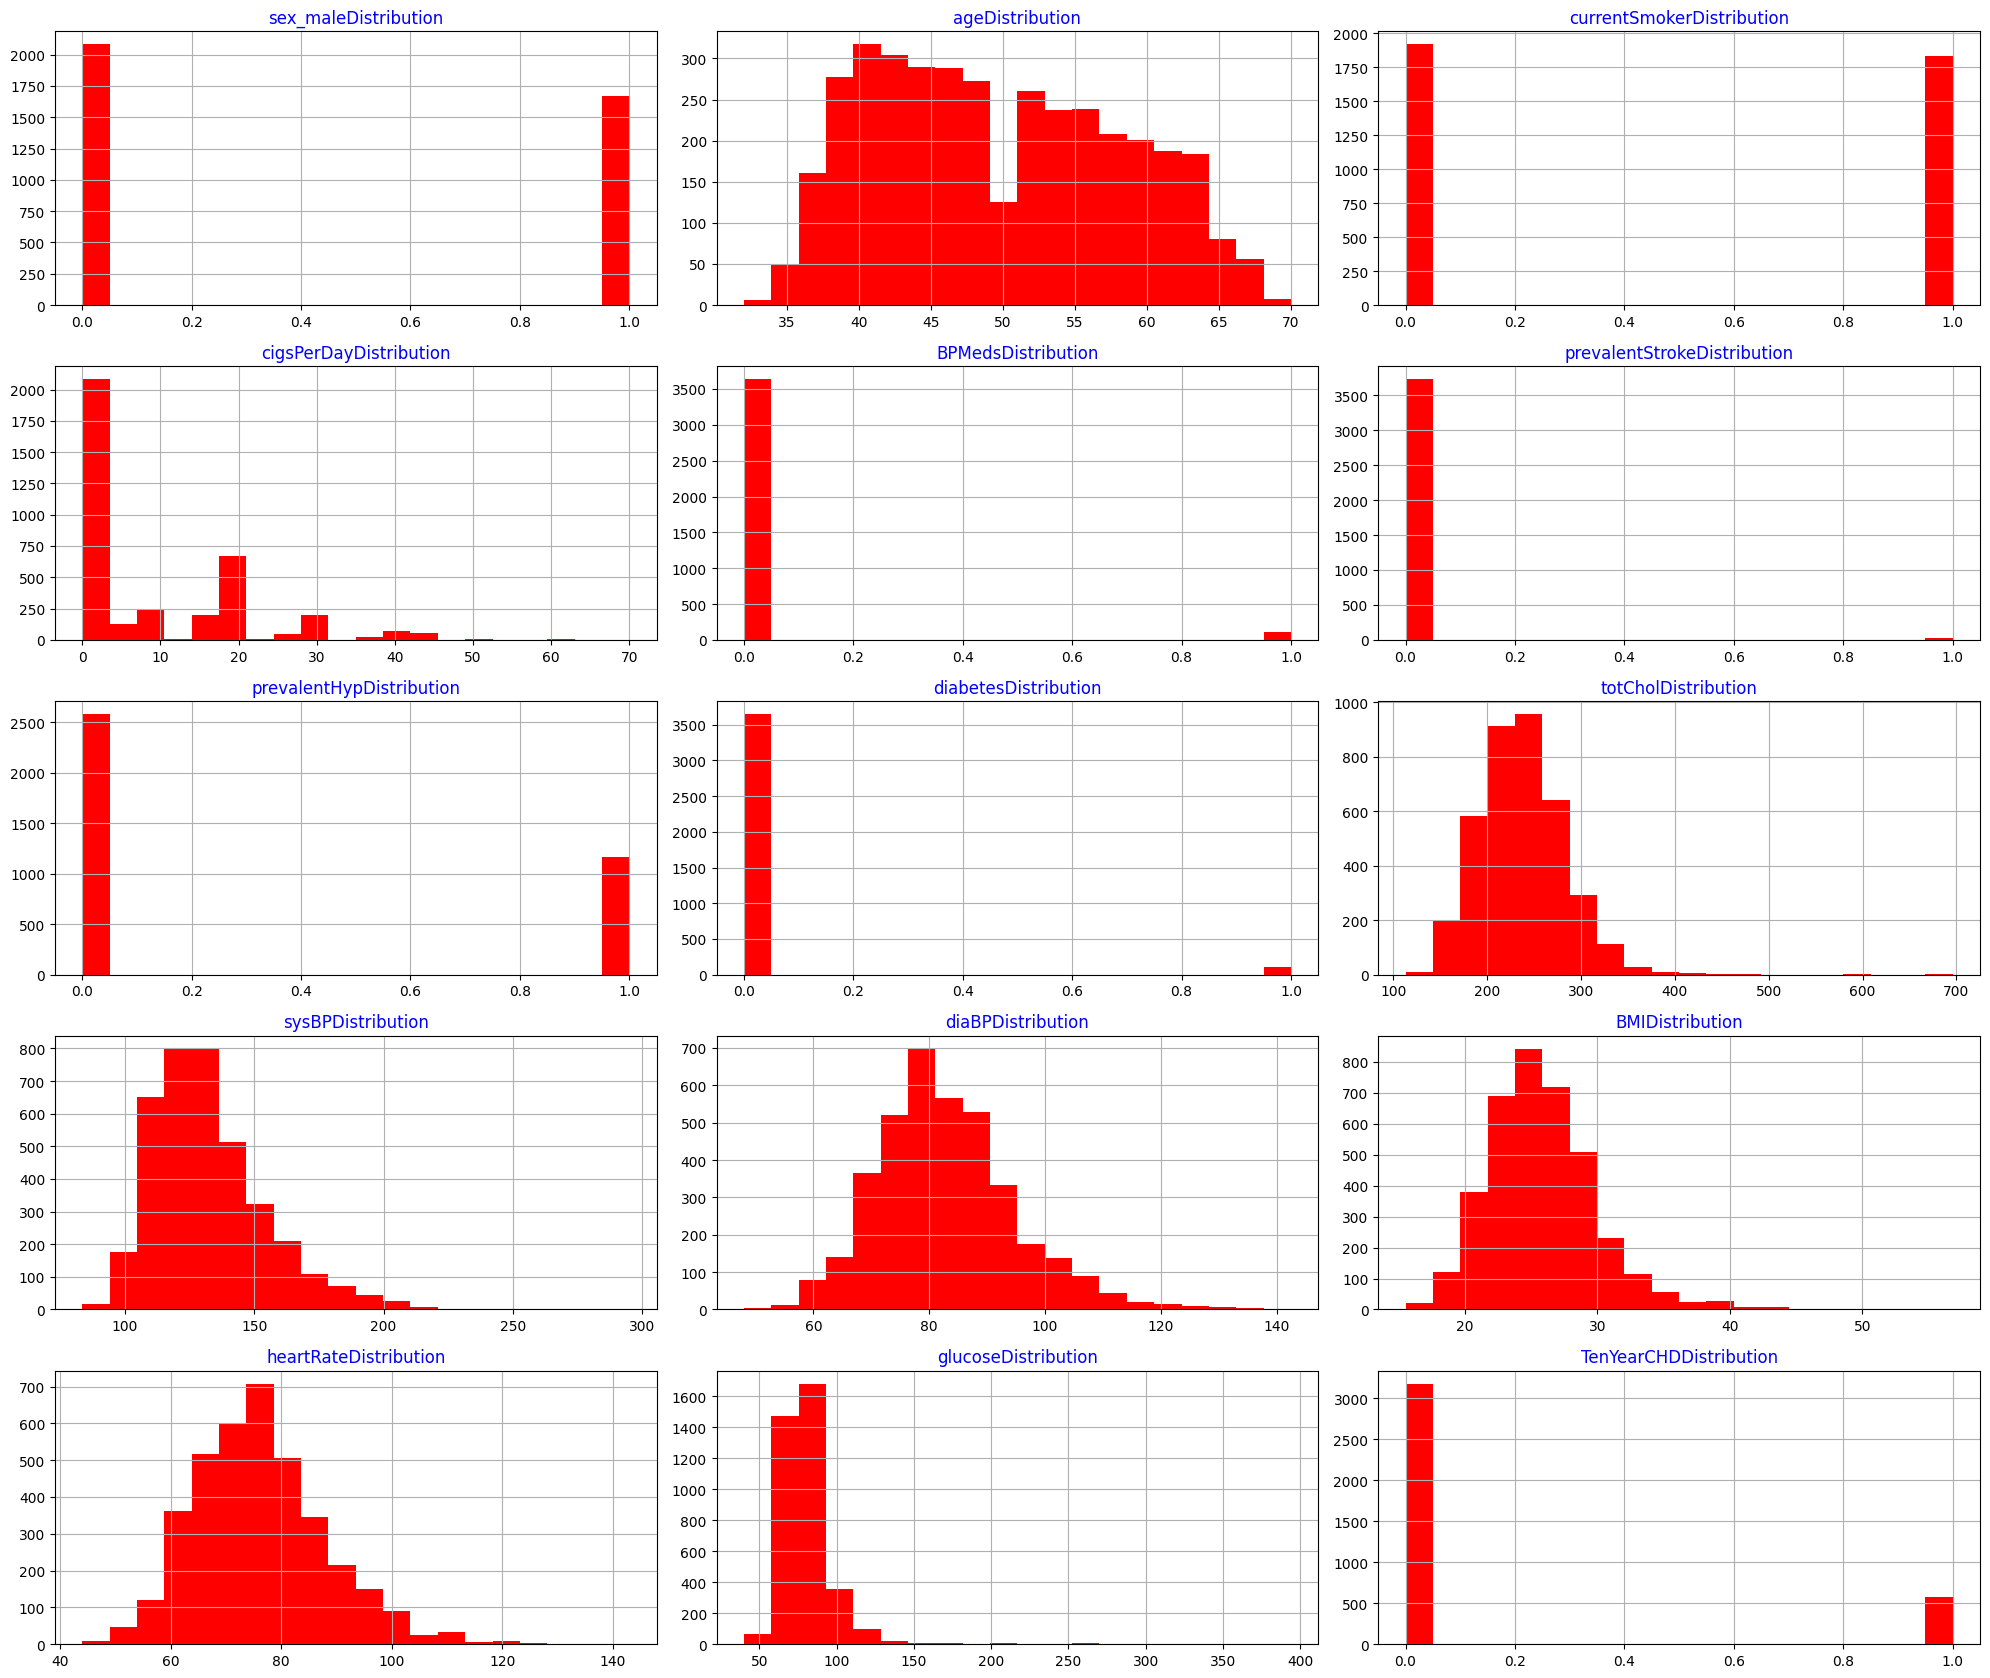

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='red')
        ax.set_title(feature+"Distribution", color='blue')
    fig.tight_layout()
    plt.show()
draw_histograms(df, df.columns, 6, 3)

In [ ]:
#The above function is plotting the histograms for each feature(characteristics of the dataset - the columns here) in the dataset.
#Histograms show the frequency of numerical data in a dataset.
#Here, the graphs that have bars at only 0 & 1 (sex_male, currentSmoker, BPMeds, prevalentStroke, diabetes, TenYearCHD) are the ones that contain nominal data. 1 means true and 0 means false.

###Q5. Using sns.countplot find out number of Positive cases and Negative cases in the dataset, i.e., in your target column.

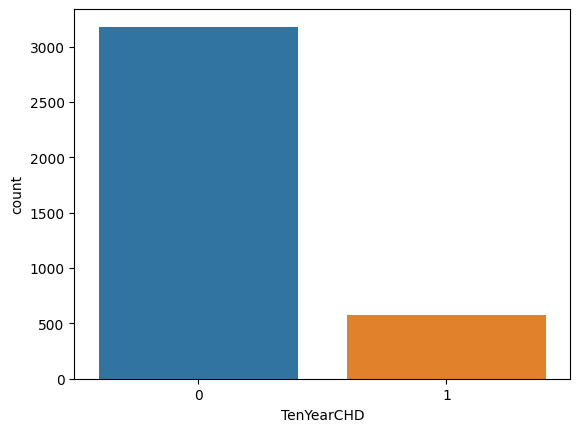

In [ ]:
sns.countplot(x='TenYearCHD', data = df)
plt.show()

###Q6a. Split the dataset into train and test and fit the training dataset in the Logistic Regression.

In [ ]:
#Split the dataset and fit the model

In [ ]:
X= df.iloc[:,:-1].values
y= df.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

###Q6b. Does running the above code give a Convergence Warning? What could be the cause of this problem? Try to find out methods that can deal with this problem.

In [ ]:
#Yes, running the above code gives a Convergence Warning.
#CAUSES:
#1. Multicollinearity - presence of highly correlated features in the dataset.
    # we can deal with this by removing some of the correlated features or by combining some correlated features.

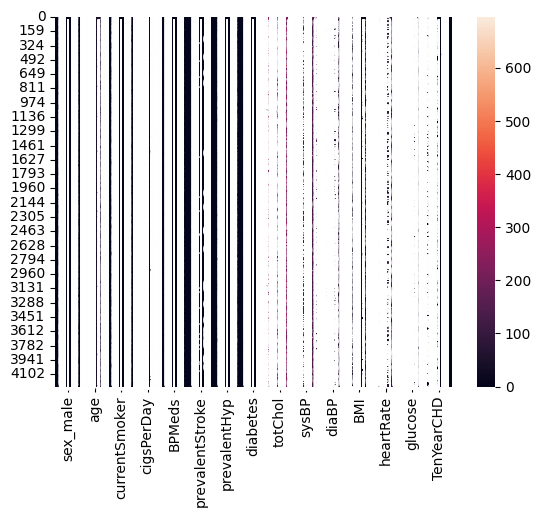

<Figure size 2000x2000 with 0 Axes>

In [ ]:
sns.heatmap(df, annot=True, fmt=".1f")
plt.figure(figsize=(20,20))
plt.show()

In [ ]:
#2. An Unsuitable Solver - solver is the algorithm the model uses to find the minimum cost.
    # we can deal with this by changing the solver
#3. Low Number of Iterations
    # we can deal with this by increasing the number of iterations
#4. Unscaled Data - sometimes the features have different scales, which makes it hard to converge at a point.
    # we can deal with this by feature scaling, i.e, ensuring that all the features are of a similiar scale by scaling some features up or down

Although there are several methods, we will use backward feature selection to solve this problem. You can learn more about feature selection using the below link.

https://www.javatpoint.com/feature-selection-techniques-in-machine-learning

Understand and run the following 4 cells which carry out backward feature selection for you. Make sure to replace 'df' by your dataframe variable

In [ ]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(df)
df_constant.head()

,const,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols = df_constant.columns[:-1]
model = sm.Logit(df.TenYearCHD, df_constant[cols])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.377036
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3736
Method:                           MLE   Df Model:                           14
Date:                Sat, 02 Dec 2023   Pseudo R-squ.:                  0.1170
Time:                        14:59:36   Log-Likelihood:                -1414.3
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 2.439e-71
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.6532      0.687    -12.589      0.000     -10.000      -7.306
sex_male            0.5742      0.107      5.345      0.000       0.364       0.785
age                 0.0641      0.007      9.799      0.000       0.051       0.077
currentSmoker       0.0739      0.155      0.478      0.633      -0.229       0.377
cigsPerDay          0.0184      0.006      3.000      0.003       0.006       0.030
BPMeds              0.1448      0.232      0.623      0.533      -0.310       0.600
prevalentStroke     0.7193      0.489      1.471      0.141      -0.239       1.678
prevalentHyp        0.2142      0.136      1.571      0.116      -0.053       0.481
diabetes            0.0022      0.312      0.007      0.994      -0.610       0.614
totChol             0.0023      0.001      2.081      0.037       0.000       0.004
sysBP               0.0154      0.004      4.082      0.000       0.008       0.023
diaBP              -0.0040      0.006     -0.623      0.533      -0.016       0.009
BMI                 0.0103      0.013      0.827      0.408      -0.014       0.035
heartRate          -0.0023      0.004     -0.549      0.583      -0.010       0.006
glucose             0.0076      0.002      3.409      0.001       0.003       0.012
===================================================================================
"""

In [ ]:
def back_feature_elem (data_frame, dep_var, col_list):
    while len(col_list)>0 :
        model = sm.Logit(dep_var,data_frame[col_list])
        result = model.fit(disp=0)
        largest_pvalue = round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list = col_list.drop(largest_pvalue.index)
result = back_feature_elem(df_constant, df.TenYearCHD, cols)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3744
Method:                           MLE   Df Model:                            6
Date:                Sat, 02 Dec 2023   Pseudo R-squ.:                  0.1149
Time:                        14:59:40   Log-Likelihood:                -1417.7
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 2.127e-76
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1264      0.468    -19.504      0.000     -10.043      -8.209
sex_male       0.5815      0.105      5.524      0.000       0.375       0.788
age            0.0655      0.006     10.343      0.000       0.053       0.078
cigsPerDay     0.0197      0.004      4.805      0.000       0.012       0.028
totChol        0.0023      0.001      2.106      0.035       0.000       0.004
sysBP          0.0174      0.002      8.162      0.000       0.013       0.022
glucose        0.0076      0.002      4.574      0.000       0.004       0.011
==============================================================================
"""

In [ ]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue = round(result.pvalues,3)
conf['pvalue'] = pvalue
conf.columns = ['CI 95%(2.5%)','CI 95%(97.5%)', 'Odds Ratio', 'pvalue']
print((conf))

            CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const           0.000043       0.000272    0.000109   0.000
sex_male        1.455242       2.198536    1.788687   0.000
age             1.054483       1.080969    1.067644   0.000
cigsPerDay      1.011733       1.028128    1.019897   0.000
totChol         1.000158       1.004394    1.002273   0.035
sysBP           1.013292       1.021784    1.017529   0.000
glucose         1.004346       1.010898    1.007617   0.000


###Q7. The above table mentions the columns with the highest importance. Create a new dataframe with just these columns and your target column. Split it into training and testing dataset and fit the training data into Logistic regression model. Also predict the y values for the test set.

In [ ]:
#Split the new dataset and fit the model

In [ ]:
df2 = df[["sex_male", "age", "cigsPerDay", "totChol", "glucose", "TenYearCHD"]]
df2

,sex_male,age,cigsPerDay,totChol,glucose,TenYearCHD
0,1,39,0.0,195.0,77.0,0
1,0,46,0.0,250.0,76.0,0
2,1,48,20.0,245.0,70.0,0
3,0,61,30.0,225.0,103.0,1
4,0,46,23.0,285.0,85.0,0
...,...,...,...,...,...,...
4233,1,50,1.0,313.0,86.0,1
4234,1,51,43.0,207.0,68.0,0
4237,0,52,0.0,269.0,107.0,0
4238,1,40,0.0,185.0,72.0,0


In [ ]:
X1= df2.iloc[:,:-1].values
y1= df2.iloc[:, -1].values

In [ ]:
X1_train, X1_test, y1_train, y1_test= train_test_split(X1, y1, test_size= 0.2)

In [ ]:
model1 = LogisticRegression()
model1.fit(X1_train, y1_train)

LogisticRegression()

In [ ]:
predictions = model1.predict(X1_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

###Q8a. Create a confusion matrix for y test and y predcted values. Since this is prediction of heart disease which metric should be given more importance - Precision or Recall? Justify.

In [ ]:
#Code for confusion matrix

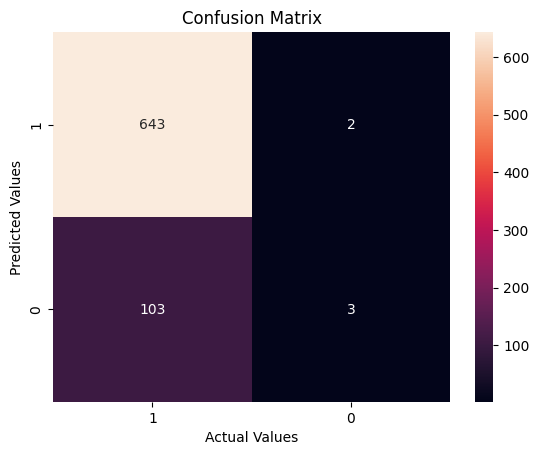

In [ ]:
cm= confusion_matrix(y1_test, predictions)
sns.heatmap(cm, annot=True, fmt='g',xticklabels=['1','0'], yticklabels=['1','0']).set(xlabel="Actual Values", ylabel="Predicted Values", title="Confusion Matrix")
plt.show()

###Q8b. Using the above confusion matrix, how would you find out Accuracy, Precision and Recall values. Calculate them using the formulae which takes into account True Positive, False Positive, True Negative and False Negative values.

In [ ]:
# No. of True Positives = 643
# No. of False Positives = 2
# No. of False Negatives = 103
# No. of True Negatives = 3

# PRECISION = TP/(TP + FP) = 0.997
# RECALL = TP/(TP + FN) = 0.862
# ACCURACY = (TP + TN)/(TP + TN + FP + FN) = 0.860
# F-MEASURE = (2*RECALL*PRECISION)/(RECALL + PRECISION) = 0.924